# Preprocessing

## 1. Import Essential Packages

In [1]:
# Import essential packages
import os
import missingno
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting settings
# In case the font Cambria is not locally installed in you system, 
# comment out the line below
plt.rcParams['font.serif'] = "Cambria"
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.size'] = 14
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = 10,6

# Set seed for reproducilibity
np.random.seed(0)

# Define paths that are necessary
DPATH = "../data/"
RPATH = "../results/"
IPATH = "../images/"

if "data" not in os.listdir("../"):
    os.mkdir(DPATH)
if "images" not in os.listdir("../"):
    os.mkdir(IPATH)
if "results" not in os.listdir("../"):
    os.mkdir(RPATH)

## 3. Read the Data

In [2]:
base_url = "https://raw.githubusercontent.com/cjsmith015/phytochemical-diversity-cannabis/main/data/"
fnames = ["preproc_lab_data_pub_20220218.csv", "preproc_lab_data_pub_20220218_nl.csv", "strain_info_pub_20210915.csv"]
if not os.listdir(DPATH):
    for fname in fnames:
        url = base_url + fname
        df = pd.read_csv(url, index_col=0)
    
        df.to_csv(DPATH+fname)

In [3]:
df = pd.read_csv(DPATH+fnames[0], index_col=0)
# Drop inessential columns
df.drop(columns = ['lab_id', 'anon_producer', 'product_category', 'strain_category', \
                   'strain_popularity', 'chemotype', 'has_cannabs', 'has_terps', 'terp_var', \
                   'chemotype_ratio','total_terps', 'top_terp_f'], inplace=True)
df

,strain_slug,region,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,tot_ocimene,camphene,...,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
u_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,AK,20.103098,0.047210,1.097430,0.000000,0.000,0.255775,0.251212,0.01,...,0.217018,0.560682,0.159195,0.032776,0.177072,0.029597,0.114252,0.010000,0.321310,0.075442
1,NaN,AK,17.775078,0.085711,0.904467,0.046734,0.000,0.050000,0.374661,0.01,...,0.143383,0.315326,0.127196,0.010000,0.199761,0.010000,0.069859,0.012731,0.365565,0.060920
2,NaN,AK,18.196924,0.079075,0.923358,0.056123,0.000,0.050000,0.334714,0.01,...,0.140367,0.306051,0.111072,0.022061,0.177568,0.010000,0.057884,0.011981,0.336826,0.049393
3,NaN,AK,19.302718,0.059964,0.517679,0.034465,0.000,0.050000,0.010000,0.01,...,0.167629,0.385306,0.134872,0.056048,0.368547,0.048849,0.035711,0.000000,0.000000,0.020058
4,NaN,AK,18.224250,0.071973,0.966903,0.000000,0.000,0.231606,0.158674,0.01,...,0.127600,0.317787,0.116072,0.029350,0.099418,0.010000,0.083642,0.010000,0.179980,0.056437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89918,cereal-milk,CA,17.619045,NaN,0.306790,0.001000,0.001,NaN,0.000000,NaN,...,0.072000,0.229000,0.166000,0.070000,0.130000,0.040000,0.030000,NaN,NaN,0.015000
89919,pink-kush,CA,24.009297,NaN,0.562350,0.001000,NaN,NaN,0.000000,NaN,...,0.094000,0.315000,0.304000,0.100000,0.240000,0.110000,0.050000,NaN,NaN,0.030000
89920,pink-kush,CA,24.026490,NaN,1.162400,0.001000,NaN,NaN,0.000000,NaN,...,0.079000,0.215000,0.313000,0.120000,0.030000,0.020000,0.050000,NaN,NaN,0.033000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89923 entries, 0 to 89922
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   strain_slug       73414 non-null  object 
 1   region            89923 non-null  object 
 2   tot_thc           89854 non-null  float64
 3   tot_cbd           47205 non-null  float64
 4   tot_cbg           83251 non-null  float64
 5   tot_cbc           59545 non-null  float64
 6   tot_cbn           51993 non-null  float64
 7   tot_thcv          35682 non-null  float64
 8   tot_ocimene       85994 non-null  float64
 9   camphene          42767 non-null  float64
 10  g_terpinene       39148 non-null  float64
 11  tot_nerolidol_ct  85994 non-null  float64
 12  humulene          42913 non-null  float64
 13  caryophyllene     43145 non-null  float64
 14  limonene          43021 non-null  float64
 15  linalool          42974 non-null  float64
 16  myrcene           43144 non-null  float6

In [5]:
df.describe()

,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,tot_ocimene,camphene,g_terpinene,tot_nerolidol_ct,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
count,89854.000000,47205.000000,83251.000000,59545.000000,51993.000000,35682.000000,85994.000000,42767.000000,39148.000000,85994.000000,42913.000000,43145.000000,43021.000000,42974.000000,43144.000000,36500.000000,40312.000000,41934.000000,43047.000000,43143.000000
mean,18.051735,0.776794,0.766569,0.051537,0.021568,0.059726,0.027520,0.015886,0.007971,0.030940,0.117040,0.328473,0.273622,0.102338,0.469627,0.043923,0.090410,0.011561,0.099082,0.119702
std,4.954737,2.746992,0.573832,0.242936,0.055090,0.195025,0.091359,0.036270,0.025524,0.097256,0.088657,0.239185,0.231063,0.111005,0.432755,0.051982,0.065202,0.060127,0.267692,0.174712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.479765,0.038079,0.373007,0.000000,0.000000,0.000000,0.000000,0.007000,0.000000,0.000000,0.058290,0.161000,0.098000,0.039822,0.168200,0.010000,0.050000,0.000000,0.000000,0.031559
50%,18.292625,0.057005,0.628743,0.030000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.097000,0.270000,0.210000,0.075183,0.340000,0.030000,0.079000,0.000000,0.010000,0.058359
75%,21.102280,0.100000,0.999460,0.068700,0.025480,0.053000,0.010000,0.023373,0.010000,0.013000,0.155000,0.435661,0.394400,0.136000,0.639800,0.060000,0.114588,0.010000,0.029035,0.125826
max,35.679320,36.652970,17.636318,30.000000,1.974000,16.400000,2.320000,4.000000,1.410000,2.130000,1.109020,3.826735,3.326854,3.740000,4.523000,1.960000,1.021581,2.290000,3.006461,4.005000


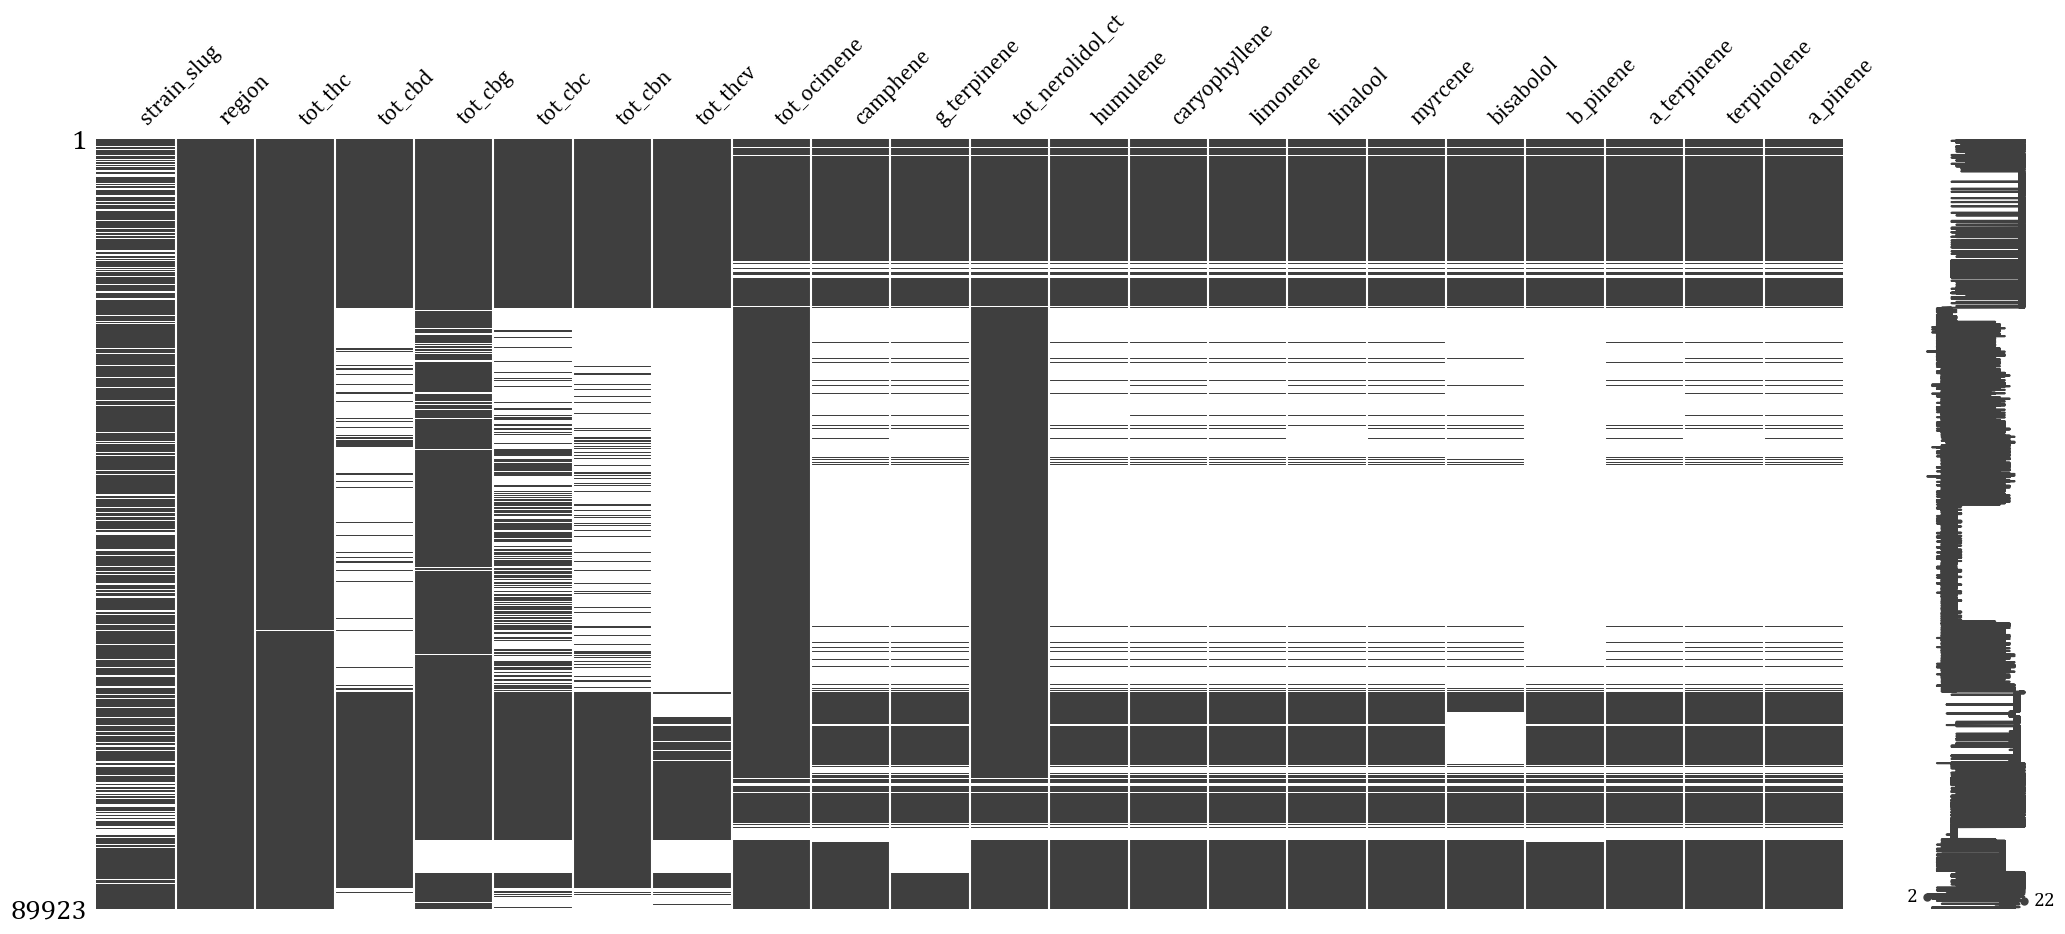

In [6]:
missingno.matrix(df)
plt.show()

In [7]:
# In case of missing strain slug, add placeholder name
flag = pd.isnull(df["strain_slug"])
df.loc[flag, "strain_slug"] = "Sample_" + df.index[flag].astype(str)
df

,strain_slug,region,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,tot_ocimene,camphene,...,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
u_id,,,,,,,,,,,,,,,,,,,,,
0,Sample_0,AK,20.103098,0.047210,1.097430,0.000000,0.000,0.255775,0.251212,0.01,...,0.217018,0.560682,0.159195,0.032776,0.177072,0.029597,0.114252,0.010000,0.321310,0.075442
1,Sample_1,AK,17.775078,0.085711,0.904467,0.046734,0.000,0.050000,0.374661,0.01,...,0.143383,0.315326,0.127196,0.010000,0.199761,0.010000,0.069859,0.012731,0.365565,0.060920
2,Sample_2,AK,18.196924,0.079075,0.923358,0.056123,0.000,0.050000,0.334714,0.01,...,0.140367,0.306051,0.111072,0.022061,0.177568,0.010000,0.057884,0.011981,0.336826,0.049393
3,Sample_3,AK,19.302718,0.059964,0.517679,0.034465,0.000,0.050000,0.010000,0.01,...,0.167629,0.385306,0.134872,0.056048,0.368547,0.048849,0.035711,0.000000,0.000000,0.020058
4,Sample_4,AK,18.224250,0.071973,0.966903,0.000000,0.000,0.231606,0.158674,0.01,...,0.127600,0.317787,0.116072,0.029350,0.099418,0.010000,0.083642,0.010000,0.179980,0.056437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89918,cereal-milk,CA,17.619045,NaN,0.306790,0.001000,0.001,NaN,0.000000,NaN,...,0.072000,0.229000,0.166000,0.070000,0.130000,0.040000,0.030000,NaN,NaN,0.015000
89919,pink-kush,CA,24.009297,NaN,0.562350,0.001000,NaN,NaN,0.000000,NaN,...,0.094000,0.315000,0.304000,0.100000,0.240000,0.110000,0.050000,NaN,NaN,0.030000
89920,pink-kush,CA,24.026490,NaN,1.162400,0.001000,NaN,NaN,0.000000,NaN,...,0.079000,0.215000,0.313000,0.120000,0.030000,0.020000,0.050000,NaN,NaN,0.033000


## 3. Preprocessing

In [8]:
df.dropna(inplace=True)
df

,strain_slug,region,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,tot_ocimene,camphene,...,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
u_id,,,,,,,,,,,,,,,,,,,,,
0,Sample_0,AK,20.103098,0.047210,1.097430,0.000000,0.0,0.255775,0.251212,0.010,...,0.217018,0.560682,0.159195,0.032776,0.177072,0.029597,0.114252,0.010000,0.321310,0.075442
1,Sample_1,AK,17.775078,0.085711,0.904467,0.046734,0.0,0.050000,0.374661,0.010,...,0.143383,0.315326,0.127196,0.010000,0.199761,0.010000,0.069859,0.012731,0.365565,0.060920
2,Sample_2,AK,18.196924,0.079075,0.923358,0.056123,0.0,0.050000,0.334714,0.010,...,0.140367,0.306051,0.111072,0.022061,0.177568,0.010000,0.057884,0.011981,0.336826,0.049393
3,Sample_3,AK,19.302718,0.059964,0.517679,0.034465,0.0,0.050000,0.010000,0.010,...,0.167629,0.385306,0.134872,0.056048,0.368547,0.048849,0.035711,0.000000,0.000000,0.020058
4,Sample_4,AK,18.224250,0.071973,0.966903,0.000000,0.0,0.231606,0.158674,0.010,...,0.127600,0.317787,0.116072,0.029350,0.099418,0.010000,0.083642,0.010000,0.179980,0.056437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88943,Sample_88943,CA,18.954970,0.043850,1.195020,0.000000,0.0,0.000000,0.000000,0.005,...,0.215000,0.674000,0.453000,0.141000,0.582000,0.069000,0.068000,0.000000,0.000000,0.040000
88944,Sample_88944,CA,20.088010,0.043850,1.004540,0.000000,0.0,0.000000,0.000000,0.014,...,0.154000,0.493000,0.572000,0.244000,0.462000,0.065000,0.098000,0.000000,0.018000,0.057000
88980,gods-gift,CA,14.578580,0.043850,0.398340,0.010000,0.0,0.000000,0.087000,0.003,...,0.133000,0.278000,0.067000,0.030000,0.533000,0.056000,0.066000,0.000000,0.000000,0.142000


In [9]:
df_clean = df.copy()
cann_cols = df_clean.columns[2:8]
terp_cols = df_clean.columns[8:]

# Normalize the Cannabinoids and Terpenes columns
df_clean[cann_cols] = df_clean[cann_cols]/df[cann_cols].sum(axis=1).to_numpy().reshape(-1, 1)
df_clean[terp_cols] = df_clean[terp_cols]/df[terp_cols].sum(axis=1).to_numpy().reshape(-1, 1)
df_clean

,strain_slug,region,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,tot_ocimene,camphene,...,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
u_id,,,,,,,,,,,,,,,,,,,,,
0,Sample_0,AK,0.934875,0.002195,0.051035,0.000000,0.0,0.011895,0.126627,0.005041,...,0.109391,0.282619,0.080244,0.016521,0.089255,0.014919,0.057590,0.005041,0.161961,0.038028
1,Sample_1,AK,0.942376,0.004544,0.047952,0.002478,0.0,0.002651,0.215732,0.005758,...,0.082561,0.181566,0.073240,0.005758,0.115024,0.005758,0.040225,0.007331,0.210494,0.035078
2,Sample_2,AK,0.942578,0.004096,0.047829,0.002907,0.0,0.002590,0.208189,0.006220,...,0.087307,0.190361,0.069086,0.013722,0.110446,0.006220,0.036003,0.007452,0.209503,0.030722
3,Sample_3,AK,0.966836,0.003003,0.025930,0.001726,0.0,0.002504,0.008019,0.008019,...,0.134423,0.308981,0.108156,0.044945,0.295542,0.039173,0.028637,0.000000,0.000000,0.016085
4,Sample_4,AK,0.934829,0.003692,0.049598,0.000000,0.0,0.011880,0.129744,0.008177,...,0.104336,0.259848,0.094910,0.023999,0.081292,0.008177,0.068392,0.008177,0.147166,0.046147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88943,Sample_88943,CA,0.938651,0.002171,0.059177,0.000000,0.0,0.000000,0.000000,0.002157,...,0.092752,0.290768,0.195427,0.060828,0.251079,0.029767,0.029336,0.000000,0.000000,0.017256
88944,Sample_88944,CA,0.950399,0.002075,0.047527,0.000000,0.0,0.000000,0.000000,0.006301,...,0.069307,0.221872,0.257426,0.109811,0.207921,0.029253,0.044104,0.000000,0.008101,0.025653
88980,gods-gift,CA,0.969916,0.002917,0.026502,0.000665,0.0,0.000000,0.059835,0.002063,...,0.091472,0.191197,0.046080,0.020633,0.366575,0.038514,0.045392,0.000000,0.000000,0.097662


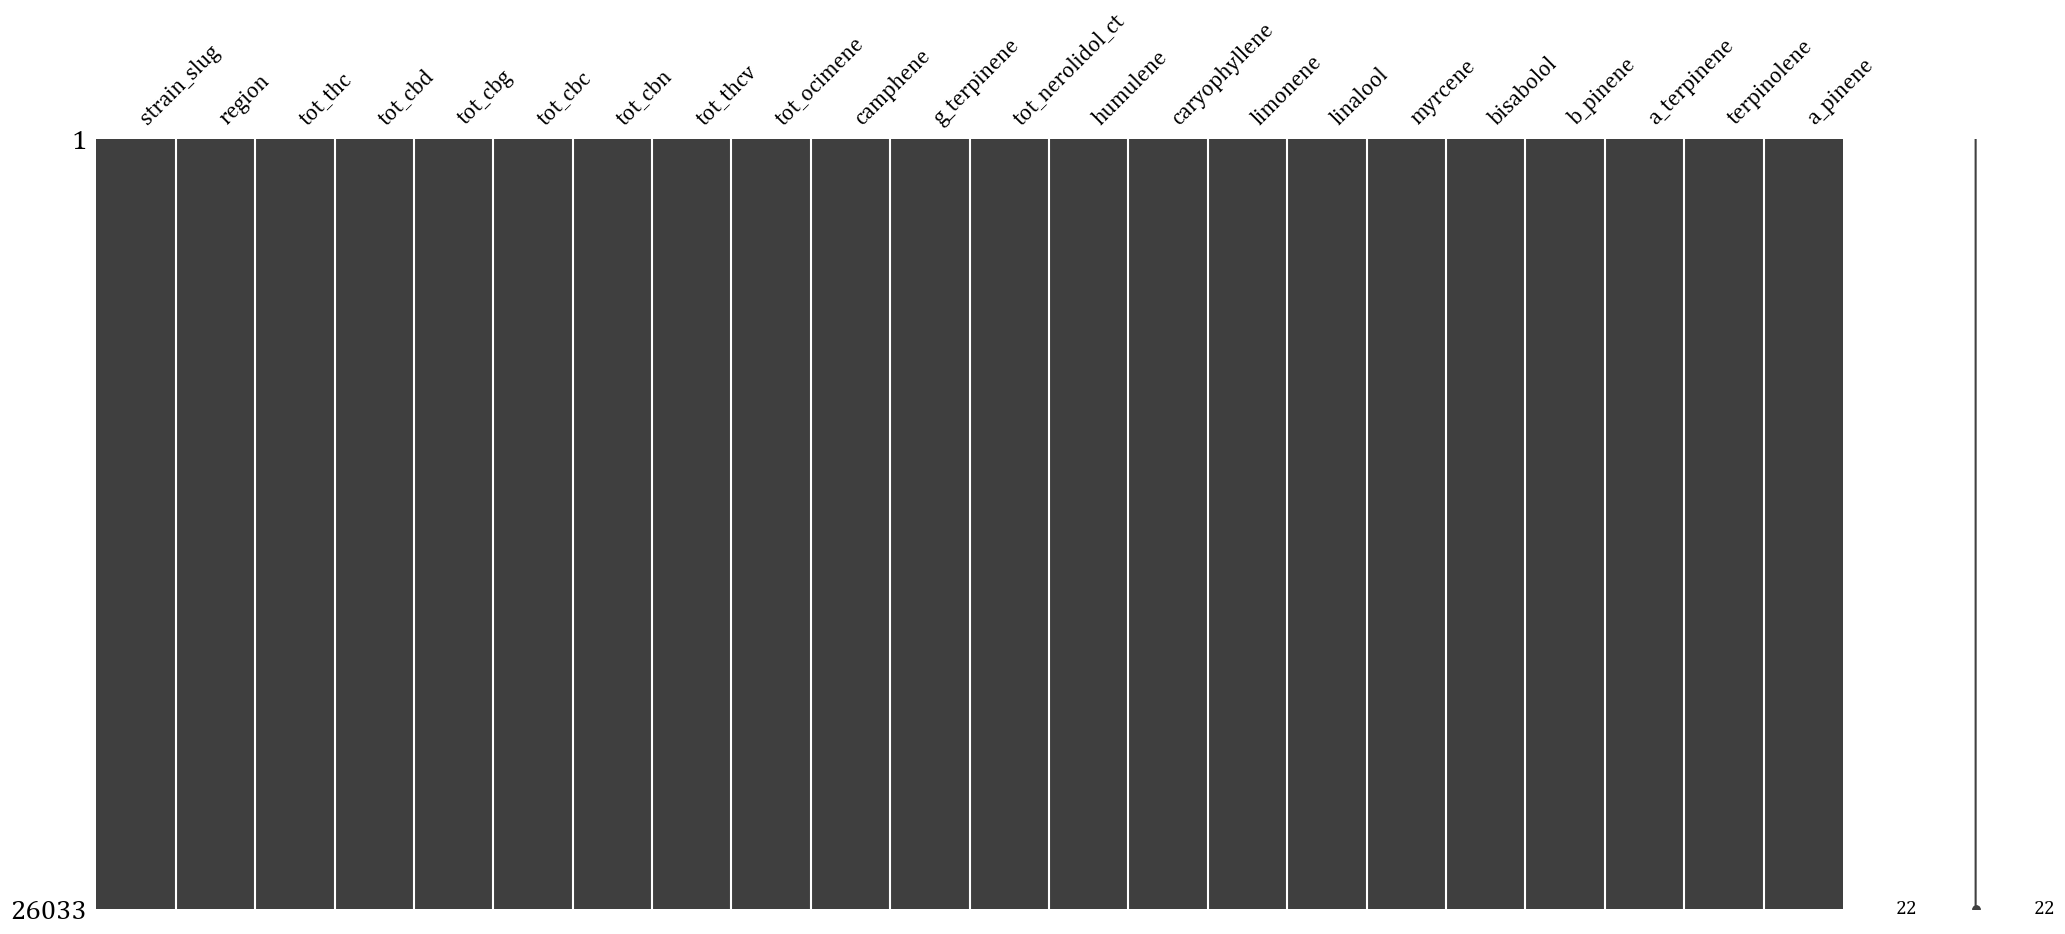

In [10]:
missingno.matrix(df_clean)
plt.show()

## 4. EDA on the Data

In [11]:
# Convert the class of region to that of a categorical
df_clean["region"], maps = pd.factorize(df_clean["region"], sort=True)
df_clean

,strain_slug,region,tot_thc,tot_cbd,tot_cbg,tot_cbc,tot_cbn,tot_thcv,tot_ocimene,camphene,...,humulene,caryophyllene,limonene,linalool,myrcene,bisabolol,b_pinene,a_terpinene,terpinolene,a_pinene
u_id,,,,,,,,,,,,,,,,,,,,,
0,Sample_0,0,0.934875,0.002195,0.051035,0.000000,0.0,0.011895,0.126627,0.005041,...,0.109391,0.282619,0.080244,0.016521,0.089255,0.014919,0.057590,0.005041,0.161961,0.038028
1,Sample_1,0,0.942376,0.004544,0.047952,0.002478,0.0,0.002651,0.215732,0.005758,...,0.082561,0.181566,0.073240,0.005758,0.115024,0.005758,0.040225,0.007331,0.210494,0.035078
2,Sample_2,0,0.942578,0.004096,0.047829,0.002907,0.0,0.002590,0.208189,0.006220,...,0.087307,0.190361,0.069086,0.013722,0.110446,0.006220,0.036003,0.007452,0.209503,0.030722
3,Sample_3,0,0.966836,0.003003,0.025930,0.001726,0.0,0.002504,0.008019,0.008019,...,0.134423,0.308981,0.108156,0.044945,0.295542,0.039173,0.028637,0.000000,0.000000,0.016085
4,Sample_4,0,0.934829,0.003692,0.049598,0.000000,0.0,0.011880,0.129744,0.008177,...,0.104336,0.259848,0.094910,0.023999,0.081292,0.008177,0.068392,0.008177,0.147166,0.046147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88943,Sample_88943,1,0.938651,0.002171,0.059177,0.000000,0.0,0.000000,0.000000,0.002157,...,0.092752,0.290768,0.195427,0.060828,0.251079,0.029767,0.029336,0.000000,0.000000,0.017256
88944,Sample_88944,1,0.950399,0.002075,0.047527,0.000000,0.0,0.000000,0.000000,0.006301,...,0.069307,0.221872,0.257426,0.109811,0.207921,0.029253,0.044104,0.000000,0.008101,0.025653
88980,gods-gift,1,0.969916,0.002917,0.026502,0.000665,0.0,0.000000,0.059835,0.002063,...,0.091472,0.191197,0.046080,0.020633,0.366575,0.038514,0.045392,0.000000,0.000000,0.097662


In [12]:
maps

Index(['AK', 'CA', 'FL', 'MI', 'OR', 'WA'], dtype='object')

In [13]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26033 entries, 0 to 88999
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   strain_slug       26033 non-null  object 
 1   region            26033 non-null  int64  
 2   tot_thc           26033 non-null  float64
 3   tot_cbd           26033 non-null  float64
 4   tot_cbg           26033 non-null  float64
 5   tot_cbc           26033 non-null  float64
 6   tot_cbn           26033 non-null  float64
 7   tot_thcv          26033 non-null  float64
 8   tot_ocimene       26033 non-null  float64
 9   camphene          26033 non-null  float64
 10  g_terpinene       26033 non-null  float64
 11  tot_nerolidol_ct  26033 non-null  float64
 12  humulene          26033 non-null  float64
 13  caryophyllene     26033 non-null  float64
 14  limonene          26033 non-null  float64
 15  linalool          26033 non-null  float64
 16  myrcene           26033 non-null  float6

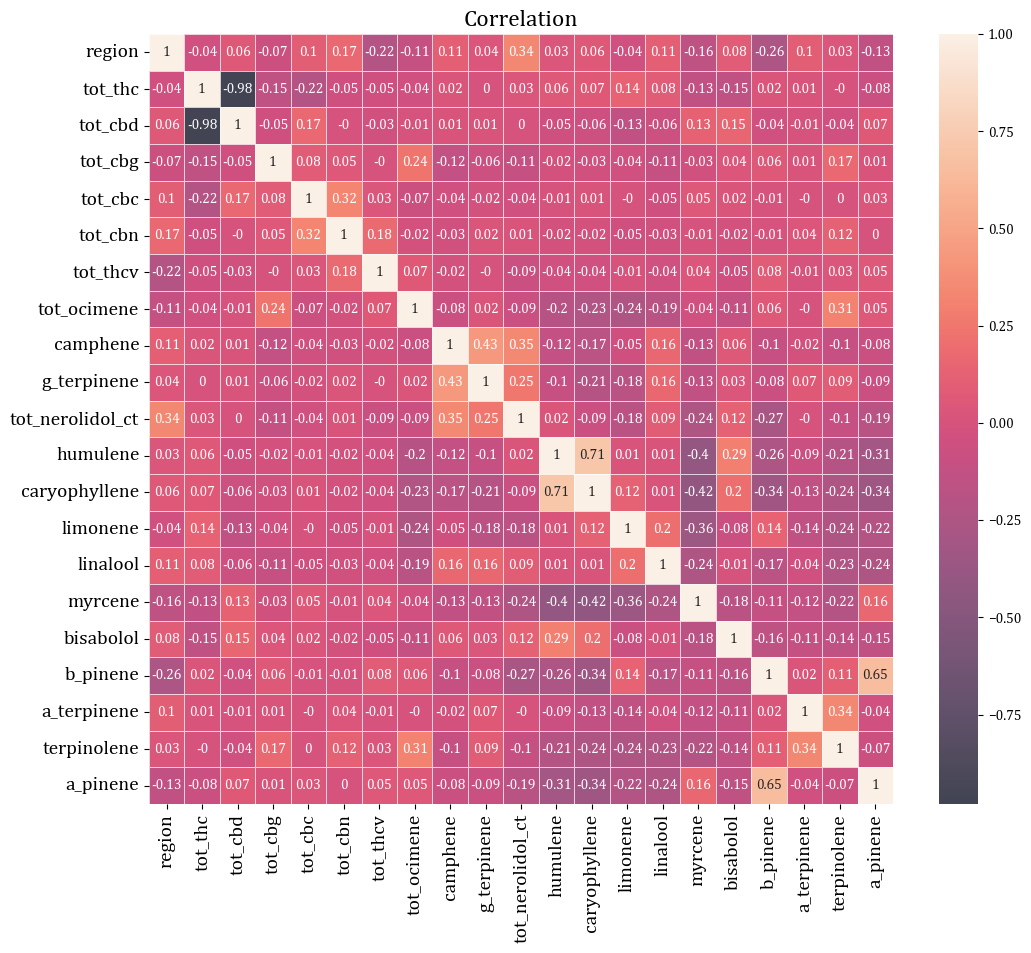

In [14]:
plt.figure(figsize=[12,10])
plt.title("Correlation")
plt.rcParams.update({'font.size': 10})
sns.heatmap(df_clean[df_clean.columns[1:]].corr().round(2), linewidths=.5, annot=True, alpha=0.75)
plt.grid(False)
plt.show()

In [15]:
abs_corr = df_clean[df_clean.columns[1:]].corr().abs()
abs_corr = abs_corr.unstack()
abs_corr.sort_values(ascending=False, inplace=True)
abs_corr[abs_corr != 1].iloc[:10:2]

tot_thc        tot_cbd          0.975263
humulene       caryophyllene    0.711619
b_pinene       a_pinene         0.654239
camphene       g_terpinene      0.434284
caryophyllene  myrcene          0.416446
dtype: float64

Some observation:
- tot_cbd and tot_thc are highly negatively correlated
- a_pinene and b_pinene are highly positively correlated
- caryophyllene and humulene are highly positively correlated
- camphene and g_terpinene are positively correlated
- caryophyllene and myrcene are negatively correlated
- tot_nerolidol_ct is positively correlated with the value of region. The value for region corresponds to 'AK', 'CA', 'FL', 'MI', 'OR', 'WA', in that order. Higher values are assigned to WA, OR and MI. Hence, the cannabis from these states generally tend to have greater fragrance

In [16]:
df_clean.to_csv(DPATH+"cleaned_data.csv")